# Задание 1

Задание: по *каждой* авиакомпании оценить *вероятность* того, что задержка *прилета* 
    будет положительной и нарисовать график, показывающий распределение этой вероятности по авиакомпаниям.

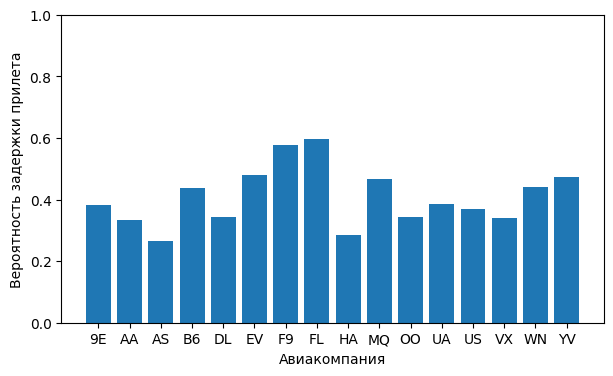

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Data\\flights_NY.csv').dropna(axis=0)

carriers = np.sort(pd.unique(df.carrier)) #Список авиакомпаний
LateProb = pd.Series(dtype='float64')  #Сюда заносятся вероятности

for carrier in carriers:    
    dfLate = df.loc[df.arr_delay > 0].loc[df.carrier == carrier]
    late = dfLate.shape[0]
    df1 = df.loc[df.carrier == carrier]
    total = df1.shape[0]
    LateProb[carrier] = late/total
    
fig1 = plt.figure(figsize=(7,4))
ax1 = fig1.add_subplot()
ax1.bar(LateProb.index, LateProb)
ax1.set_xlabel('Авиакомпания')
ax1.set_ylabel('Вероятность задержки прилета')
ax1.set_ylim(0, 1)
plt.show()
df

Рис. 1 Распределение вероятности того, что самолёт данной авиакомпании прибудет в точку назначения позже расписания.

# Задание 2

Задание: постройте гистограмму расстояния перелета distance. 

1) Выделите на ней три группы перелетов: короткие, средние и длинные. 
2) Какие значения distance разумно выбрать в качестве границы, разделяющей короткие, средние и длинные перелеты? 
3) Куда летят самолеты в группе длинных перелетов? 
4) Найдите среднее время задержки вылета в каждой из трех выделенных групп

1. Построим "хорошую" гистограмму, из которой можно выделить важную информацию о полётах

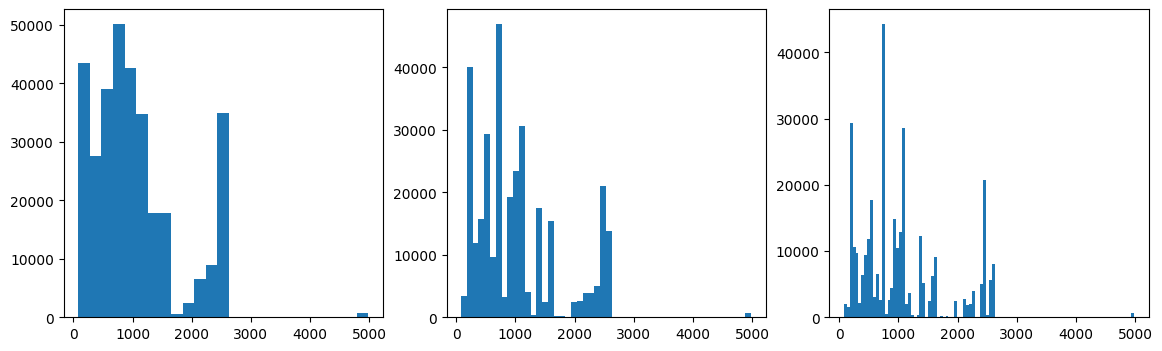

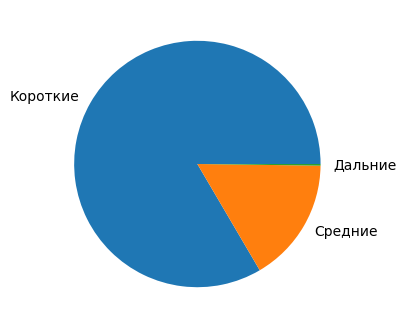

['ABQ' 'BUR' 'BZN' 'EGE' 'HDN' 'JAC' 'LAS' 'LAX' 'LGB' 'MTJ' 'OAK' 'PDX'
 'PHX' 'PSP' 'SAN' 'SEA' 'SFO' 'SJC' 'SLC' 'SMF' 'SNA']


In [3]:
fig2 = plt.figure(figsize=(14,4))
ax1 = plt.subplot(1,3,1)
ax1.hist(df.distance,25)
ax2 = plt.subplot(1,3,2)
ax2.hist(df.distance,50)
ax3 = plt.subplot(1,3,3)
ax3.hist(df.distance,100)

df1 = df.loc[df.distance > 1700]

fig3 = plt.figure(figsize=(7,4))
ax = plt.subplot(1,1,1)
ax.hist(df1.distance, 25)


short  = df.loc[df.distance < 1700] 
medium = df.loc[df.distance >= 1700].loc[df.distance < 3000]
long   = df.loc[df.distance >= 3000]

destinations = np.unique(medium.dest)

vals = [len(short), len(medium), len(long)]
ax.pie(vals, labels=['Короткие', 'Средние', 'Дальние'])
plt.show()

print(destinations)

  Из трех гистограмм с различным числом бинов (25, 50 и 100 соответственно) наибольший интерес представляет **первая**. На ней чётко видны дистанции, полёты на которые совершались гораздо реже, чем на более или менее продолжительные. Отсутствие полётов на эти дистанции может говорить об отсутствии крупных аэропортов в этой области (возможно, из-за гор на западной половине США)
    
  Также можно узнать номер этого минимального бина непосредственно по рисунку, а именно, **девять**. Он соответствует расстояниям примерно от 1600 до 1800 км. То есть за границу между короткими и средними перелётами разумно взять значение   **1700 км**.
  
  За границу, разделяющую средние и дальние полёты, можно принять **3000 км**, например (в этой области полёты отсутствуют вовсе)
  
  Непосредственно под пай-чартом выведены аэропорты, куда следуют полёты средней дистанции. Большинство этих аэропортов находятся на западном побережье США. Лететь вглубь материка, не долетая до берега, не имеет смысла - там находятся горы.
  
  Таким образом, можно сказать, что короткие полёты отличаются от средних полётов тем, что не пересекают горы на западе США.

  Узнаем, куда летят самолеты на дальние дистанции. (Гавайи?)

In [4]:
farDest = np.unique(long['dest'])
print(farDest)

['ANC' 'HNL']


ANC - аэропорт в **Аляске**, HNL - **гавайский** аэропорт.

  Ниже получены среднее время задержки отлёта для каждой группы.

In [5]:
print("Средняя задержка отлётов для рейсов на короткие дистанции: ", short.dep_delay.mean(numeric_only=True))
print("Средняя задержка отлётов для рейсов на средние дистанции: ", medium.dep_delay.mean(numeric_only=True))
print("Средняя задержка отлётов для рейсов на длинные дистанции: ", long.dep_delay.mean(numeric_only=True))

Средняя задержка отлётов для рейсов на короткие дистанции:  12.916593451648803
Средняя задержка отлётов для рейсов на средние дистанции:  10.75103330902018
Средняя задержка отлётов для рейсов на длинные дистанции:  9.355430183356841


# Задание 3

Задание: 
0) Нарисуйте график среднего времени задержки вылета по месяцам 
1) Отметьте на нем границы доверительных интервалов с уровнем доверия 0.95. 
2) С помощью подходящего статистического теста проверьте, можно ли принять гипотезу о равенстве средних в январе и феврале на уровне значимости 0.05? на уровне значимости 0.01?

<ErrorbarContainer object of 3 artists>

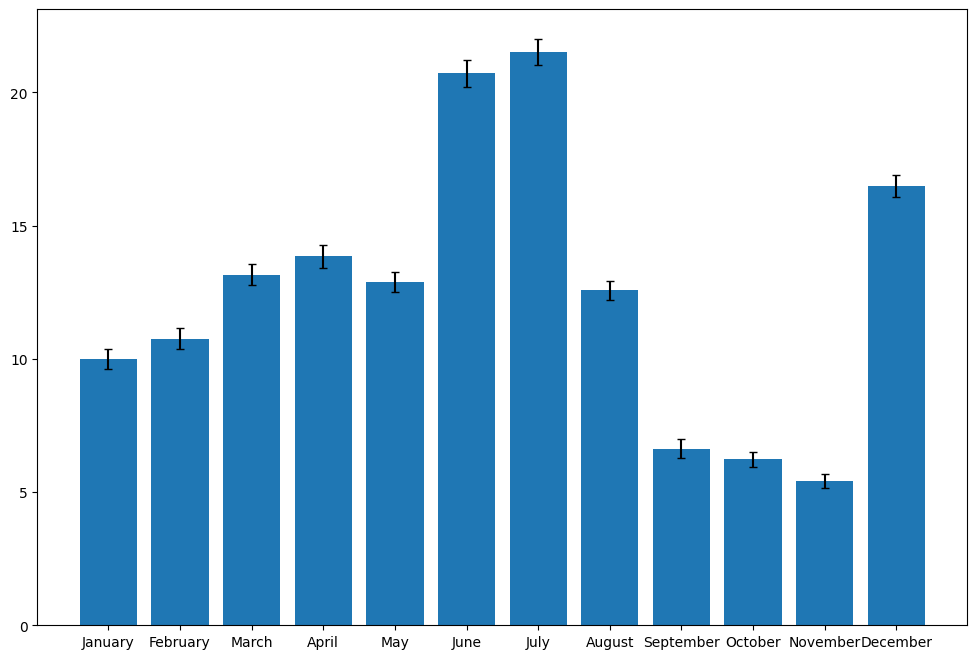

In [6]:
import calendar

months = calendar.month_name              #Названия месяцев
averDepDelay = pd.Series(dtype='float64') #Названия месяцев
err = pd.Series(dtype='float64')

for i in range(1,13):
    dfTemp = df.loc[df.month == i].dep_delay
    averDepDelay[months[i]] = dfTemp.mean(numeric_only=True)
    quantile = 1.64               #Квантиль уровня доверия 0,95
    std = np.std(dfTemp)          #Стандартное отклонение выборки за месяц
    n = len(dfTemp)               #Количество вылетов за данный месяц
    err[months[i]] = quantile*std/np.sqrt(n) #Собственно вычисление доверительного интервала

fig4 = plt.figure(figsize=(12,8))
ax = fig4.add_subplot()
ax.bar(averDepDelay.index, averDepDelay)
plt.errorbar(averDepDelay.index, averDepDelay, yerr=err, capsize=3, fmt=" ", ecolor="black")

Воспользуемся t-тестом (тестом Стьюдента), чтобы ответить на второй вопрос задачи: равны ли математические ожидания за январь и февраль?

In [11]:
dfTemp1 = df.loc[df.month == 1].dep_delay
dfTemp2 = df.loc[df.month == 2].dep_delay
JanMean = dfTemp1.mean(numeric_only=True)
FebMean = dfTemp2.mean(numeric_only=True)

std1 = np.std(dfTemp1)            #Стандартное отклонение выборки за январь
std2 = np.std(dfTemp2)            #Стандартное отклонение выборки за февраль
print("Можно видеть, что стандартные отклонения распределений примерно равны:", std1,',', std2)

n1 = len(dfTemp1)  #Количество вылетов за январь
n2 = len(dfTemp2)  #Количество вылетов за февраль
tCrit = np.abs((JanMean-FebMean)/np.sqrt(std1**2/n1 + std2**2/n2))
print('Вычислим эмпирическую статистку')
print("t =", tCrit)
print("Уровню значимости 0.05 соответствует уровню доверия 0,975, а уровню значимости 0.01 соответствует уровню доверия 0,995.")
df

Можно видеть, что стандартные отклонения распределений примерно равны: 36.30837308426437 , 36.16708113045192
Вычислим эмпирическую статистку
t = 2.3870649797889074
Уровню значимости 0.05 соответствует уровню доверия 0,975, а уровню значимости 0.01 соответствует уровню доверия 0,995.


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,-5.0,2334.0,-17.0,B6,N354JB,1816,JFK,SYR,41.0,209
336766,2013,9,30,2240.0,-10.0,2347.0,-20.0,B6,N281JB,2002,JFK,BUF,52.0,301
336767,2013,9,30,2241.0,-5.0,2345.0,-16.0,B6,N346JB,486,JFK,ROC,47.0,264
336768,2013,9,30,2307.0,12.0,2359.0,1.0,B6,N565JB,718,JFK,BOS,33.0,187


Согласно таблицам, при большом числе степеней свободы уровню значимости 0.05 соответствует p = 1,960. Полученное нами значение больше, а следовательно гипотезу о равенстве средних следует отвергнуть.

Уровню значимости 0.01 соответствует p = 2,576, что больше полученной статистики. Это значит, что на таком уровне значимости гипотезу можно принять.

# Задание 4

Задание: 0) Найдите коэффициент корреляции между расстоянием distance и временем полета air_time. 
    
1) Постройте точечную диаграмму в осях distance (х) и air_time (y). 
2) Найдите коэффициенты линейной регрессии и нанесите полученную прямую на график. 
3) Как можно интерпретировать смысл коэффициентов полученной линейной модели?

Вычислим коэффициент корреляции между расстоянием и временем полёта. $corr(X,Y) = \frac{cov(X,Y)}{\sqrt{cov(X,X)(Y,Y)}}$

$cov(X,Y) = \frac{\sum (x_i - \bar x)(y_i-\bar y)}{n-1}$

In [47]:
flightData = df.loc[:, ['distance', 'air_time']]
meanD = flightData.distance.mean(numeric_only=True)
meanT = flightData.air_time.mean(numeric_only=True)
stdD = np.std(flightData.distance)
stdT = np.std(flightData.air_time)
n = flightData.shape[0]

cov = ((flightData.distance - meanD)*(flightData.air_time - meanT)).sum() / (n-1)
corr = cov/(stdD*stdT)


print("Коэффициент корреляции между расстоянием и временем полёта равен",corr)
print("")

Коэффициент корреляции между расстоянием и временем полёта равен 0.9906526735416832



Построим точечную диаграмму и нанесём на неё прямую линейной регрессии:

Чтобы получить коэффициенты линейной регрессии, воспользуемся методом наименьших квадратов (МНК), то есть минимизируем сумму квадратов отклонений, возникающую при приближении данных некоторой прямой.

$y = b_0 + b_1x$, где
$b_1 = \frac{\sum (x_i-\bar x)(y_i -\bar y)}{\sum (x_i-\bar x)^2}$, $b_0 = \bar y - b_1 \bar x$

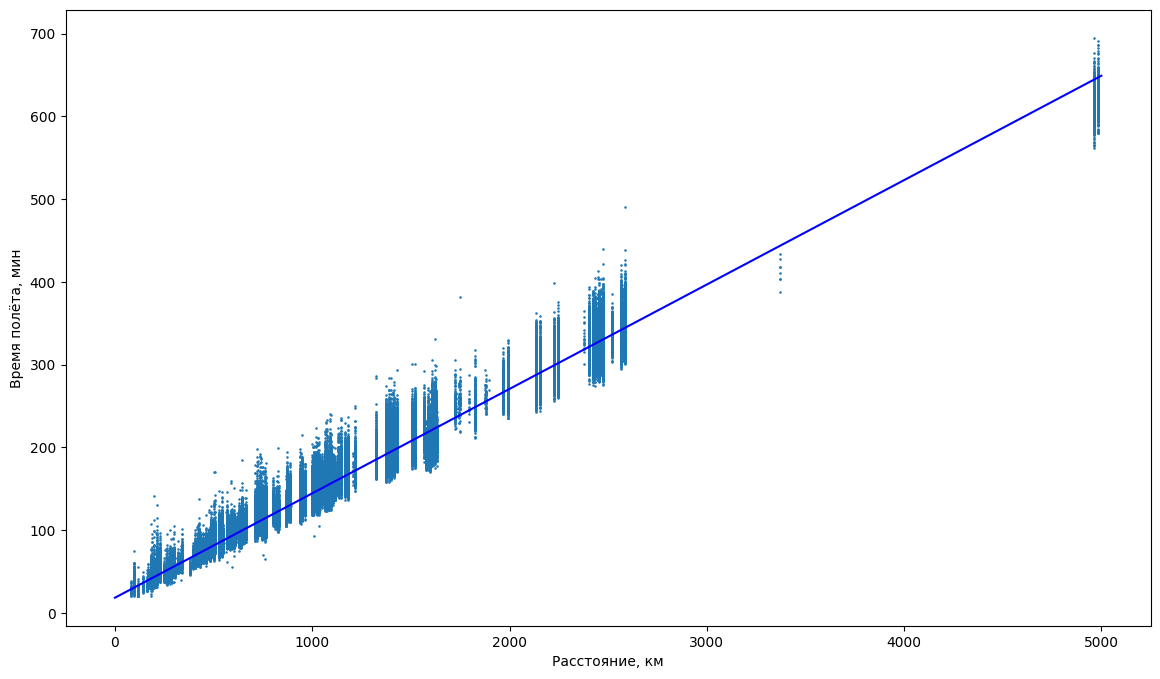

In [57]:
b1 = ((flightData.distance - meanD)*(flightData.air_time - meanT)).sum() / ((flightData.distance - meanD)**2).sum()
b0 = meanT - b1*meanD
x = np.linspace(0,5000,100)
y = b0 + b1*x

fig5 = plt.figure(figsize=(14,8))
ax4 = fig5.add_subplot()
plt.xlabel("Расстояние, км")
plt.ylabel("Время полёта, мин")
plt.scatter(flightData.distance, flightData.air_time, s=0.7)
ax4.plot(x,y, color = "b")

Каков смысл коэффициентов регрессии?

Прямая имеет вид $T = \frac{1}{v}S + T0$ или же $\frac{T-T0}{b_1} = S$

In [49]:
print("b0 =", b0)
print("b1 =", b1)

b0 = 18.466578127760386
b1 = 0.12611932467386064


Я считаю, что коэффициент b1 имеет смысл обратной скорости (время, необходимое на преодоление того или иного расстояния "средним" самолётом в мин/км), а коэффициент b0 - время (в минутах), уходящее в среднем на взлёт и на посадку, когда самолёт кружит над аэропортом (это объясняет тот факт, что при нулевом расстоянии между взлётом и посадкой проходит какое-то время).

# Задание 5

Задание: 
0) Постройте нормированную гистограмму распределения задержки прилета по тем рейсам, которые вылетели в пределах +/-15 минут от времени в расписании. 
1) Сделайте предположение о том, каким распределением может описываться полученная гистограмма. 
2) Оцените параметры этого распределения и нанесите график плотности на график с гистограммой.

Построим нормированную гистограмму распределения задержки прилёта, то есть зависимость эмпириической вероятности той или иной задержки от величины этой задержки.

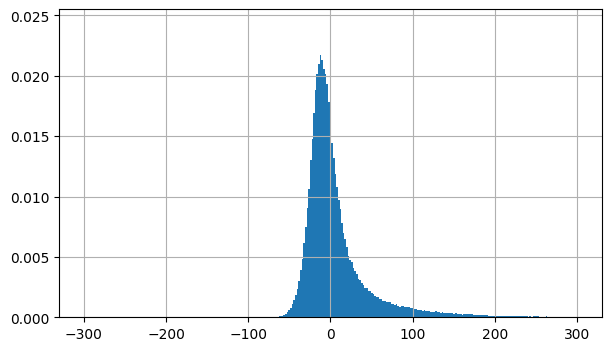

6.89537675731489 44.63322351565551


In [114]:
arr_delays = df.arr_delay
fig6 = plt.figure(figsize=(7,4))

x=np.linspace(-300,300,300)
ax5 = plt.subplot(1,1,1)
ax5.hist(arr_delays, x, density = True)
ax5.grid()
plt.show()
print(arr_delays.mean(numeric_only=True), np.std(arr_delays))

Предположим, что распределение подчинено нормальному закону. $p(x) = \frac{1}{\sqrt{2\pi} σ }\exp(-\frac{(x-\bar x)^2}{2σ^2})$.

Параметры распределения оценим из предложенной выборки.


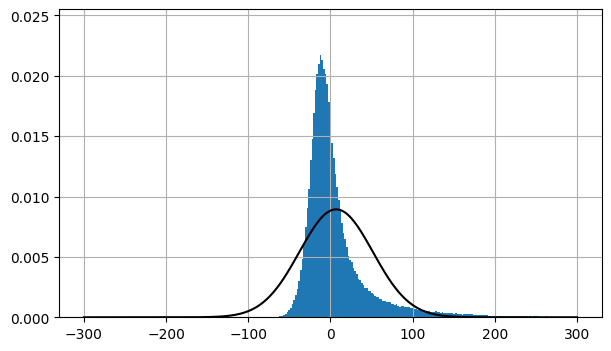

In [115]:
std = np.std(arr_delays)
av = arr_delays.mean(numeric_only=True)
y = 1/(np.sqrt(2*np.pi*std**2))*np.exp(-(x-av)**2/(2*std**2))
ax5.plot(x,y, color="black")
fig6

Как видим, нормальное распределение плохо описывает поведение данных. Вообще, следует подбирать несимметричные распределения - самолет навряд ли прибудет на полчаса раньше, но может опоздать на целый час и более (как пример).